# TD6 de Modélisations mathématiques : modèles de langage n-grammes

Dans ce sujet, nous allons utiliser les modèles n-grammes, pour identifier les auteurs de phrases en français, parmi des auteurs classiques français.

#### Import de modules python

In [58]:
import random
import os

## Utilisation de modèles n-grammes déjà construits


### Fonctions utiles pour l'utilisation des modèles n-grammes

#### Définition de constantes utiles : marqueurs de début et fin de phrase, marqueur de mot hors-vocabulaire

In [59]:
SOS_TAG = "<s>" #start of sentence tag
EOS_TAG = "</s>" #end of sentence tag
OOV_TAG = "<unk>" #out-of-vocabulary words

#### Fonction qui lit les nombres d'occurrences des n-grammes, estimés à partir d'un corpus, sauvegardé dans le fichier donné, et qui retourne un dictionnaire contenant ces informations
Le fichier est un fichier tabulaire à 2 colonnes. Chaque ligne du fichier contient un n-gramme suivi de son nombre d'occurrences estimé sur le corpus d'entraînement (les nombres d'occurrences des n-grammes sont également "comptes de n-grammes"). A l'issue de cette fonction, un dictionnaire est retourné, dans lequel les clés correspondent aux n-grammes et les valeurs à leurs nombres d'occurrences.

In [60]:
# lit un fichier de comptes dans un dictionnaire python 
def readNgramCounts(file):
    dicoCounts = {}
    
    with open(file, encoding="utf-8") as f:
        lines = f.readlines()
        for line in lines:
            tokens = line.split('\t')
            ngram = tokens[0:len(tokens)-1]
            count = tokens[-1]
            dicoCounts[' '.join(ngram)] = int(count)
        
    return dicoCounts


In [61]:
# test de la fonction
dicoNgrams = readNgramCounts("lm/small_corpus_in/ngramCounts_bigram_vocabulary1.txt")
print(dicoNgrams)

dicoNgramsOOV = readNgramCounts("lm/small_corpus_in/ngramCounts_bigram_vocabulary2.txt")
print(dicoNgramsOOV)

{'<s> denis': 1, 'écoute une': 2, 'de': 1, '</s>': 3, 'elle écoute': 1, 'thom </s>': 1, 'lionel': 1, 'denis': 1, 'une chanson': 1, 'chanson': 2, '<s> elle': 1, 'autre chanson': 1, 'elle': 1, 'denis écoute': 1, 'chanson </s>': 1, 'lionel </s>': 1, 'chanson de': 1, 'de lionel': 1, 'thom': 1, '<s>': 3, '<s> antoine': 1, 'écoute thom': 1, 'une': 2, 'antoine': 1, 'écoute': 3, 'une autre': 1, 'antoine écoute': 1, 'autre': 1}
{'écoute une': 2, 'de': 1, '</s>': 3, 'elle écoute': 1, 'thom </s>': 1, 'de <unk>': 1, 'une chanson': 1, 'chanson': 2, '<s> elle': 1, '<unk>': 2, 'autre chanson': 1, 'elle': 1, '<unk> </s>': 1, 'chanson </s>': 1, '<s> <unk>': 1, 'chanson de': 1, 'thom': 1, '<s>': 3, '<s> antoine': 1, 'écoute thom': 1, '<unk> écoute': 1, 'une': 2, 'antoine': 1, 'écoute': 3, 'une autre': 1, 'antoine écoute': 1, 'autre': 1}


#### Fonction qui retourne le nombre total d'occurrences de mots, dans le dictionnaire donné

In [62]:
# retourne le nombre total d'occurrences de mots apparaissant dans le fichier de comptes 
# (pour chaque n-gramme, on prend en compte son nombre d'occurrences)
def getTotalWordNumber(dicoCounts):
    nb = 0
    
    for ngram in dicoCounts:
        if(len(ngram.split(' ')) == 1):
            nb += dicoCounts[ngram]
            
    return nb

In [63]:
# test de la fonction
print(getTotalWordNumber(dicoNgrams))

20


#### Fonction qui retourne le nombre total d'occurrences de mots, dans le dictionnaire donné, sans prendre en compte le marqueur de début de phrase

In [64]:
# retourne le nombre total d'occurrences 
def nbWordsWithoutStart(dicoCounts):
    return getTotalWordNumber(dicoCounts) - dicoCounts[SOS_TAG]

In [65]:
# test de la fonction
print(nbWordsWithoutStart(dicoNgrams))

17


#### Fonction qui lit les mots d'un vocabulaire, sauvegardé dans le fichier donné, et qui retourne un dictionnaire contenant ces mots
Le fichier contenant un mot par ligne. A l'issue de cette fonction, un dictionnaire est retourné, dans lequel les clés correspondent aux mots et les valeurs sont vides.

In [66]:
# lit un vocabulaire dans un dictionnaire python
def readVocabulary(file):
    dicoVocab = {}
    with open(file, encoding="utf-8") as f:
        lines = f.readlines()
        for line in lines:
            dicoVocab[line.strip()] = ''
        
    return dicoVocab

In [67]:
# test de la fonction
dicoVocab = readVocabulary("lm/small_corpus_in/corpus_20000.vocab")
print(dicoVocab)

{'<s>': '', '</s>': '', ',': '', '.': '', 'de': '', 'la': '', 'et': '', 'le': '', 'les': '', 'à': '', 'il': '', "l'": '', 'un': '', 'que': '', "d'": '', 'en': '', 'des': '', 'une': '', 'qui': '', 'ne': '', "qu'": '', 'je': '', 'dans': '', ';': '', 'se': '', 'pas': '', 'est': '', 'elle': '', 'ce': '', 'pour': '', "n'": '', 'du': '', 'plus': '', "s'": '', 'son': '', 'vous': '', 'on': '', '?': '', 'par': '', 'au': '', '!': '', 'sur': '', 'sa': '', 'mais': '', 'était': '', 'lui': '', 'a': '', 'nous': '', 'ses': '', 'comme': '', 'si': '', 'cette': '', 'tout': '', 'avait': '', 'y': '', 'avec': '', 'me': '', 'ils': '', 'ces': '', 'sans': '', 'bien': '', ':': '', 'leur': '', 'ou': '', 'mon': '', 'où': '', 'deux': '', 'aux': '', '’': '', "j'": '', "m'": '', 'sont': '', 'être': '', "c'": '', 'tous': '', 'fait': '', '-il': '', 'même': '', 'homme': '', 'faire': '', 'encore': '', 'ma': '', 'leurs': '', 'dont': '', 'rien': '', 'autre': '', 'quand': '', 'ai': '', 'moi': '', 'point': '', 'peu': '', 't

#### Fonction qui retourne le nombre de mots dans une phrase (les mots sont séparés par des espaces)

In [68]:
# retourne le nombre de mots de la phrase
def getNbWords(sentence):
    return len(sentence.split(' '))

In [69]:
# test de la fonction
print(getNbWords('<s> le ciel est brûnatre </s>'))

6


#### Fonction qui remplace les mots hors-vocabulaire d'une phrase par le tag correspondant aux mots hors-vocabulaire

In [70]:
# retourne la chaîne de caractères dans laquelle les mots hors-vocabulaire ont été 
# remplacés par OOV_TAG
def getOOVWords(sentence, vocab):
    words = sentence.split(' ')
    for i in range(len(words)):
        if words[i] not in vocab:
            words[i] = OOV_TAG
    return ' '.join(words)

In [71]:
# test de la fonction
print(getOOVWords("<s> le ciel est brûnatre </s>", dicoVocab))

<s> le ciel est <unk> </s>


#### Fonction qui retourne l'historique du dernier mot du n-gramme donné, en prenant en compte la taille d'historique selon l'ordre du modèle de langage spécifié

In [72]:
# calcul l'historique d'un mot, dans une phrase, selon l'ordre spécifié
def getHistory(ngram, orderLM):
    if (len(ngram) <= 1) or (orderLM == 1):
        return ""
    else:
        words = ngram.split(' ')
        idxDeb = max(0, len(words)-orderLM)
        idxFin = max(0, len(words)-1)
        return ' '.join(words[idxDeb:idxFin])


In [73]:
# test de la fonction
print(getHistory("<s> le ciel est bleu", 1))
print(getHistory("<s> le ciel est bleu", 2))
print(getHistory("<s> le ciel est bleu", 3))

print(getHistory("<s> le", 1))
print(getHistory("<s> le", 2))
print(getHistory("<s> le", 3))


est
ciel est

<s>
<s>


#### Fonction qui décompose une phrase donnée, en la liste de ses n-grammes selon l'ordre spécifié
Cette fonction est utilisée lors du calcul de la probabilité d'une phrase.

In [74]:
# décompose une phrase en la liste de ses n-grammes, selon l'ordre spécifié
def decomposeIntoNgrams(sentence, orderLM):
    words = sentence.split(' ')
    
    return [' '.join([getHistory(' '.join(words[0:i+1]), orderLM), words[i]]).strip() for i in range(len(words))]

In [75]:
# test de la fonction
print(str(decomposeIntoNgrams("<s> le ciel est bleu </s>", 1)))
print(str(decomposeIntoNgrams("<s> le ciel est bleu </s>", 2)))
print(str(decomposeIntoNgrams("<s> le ciel est bleu </s>", 3)))

['<s>', 'le', 'ciel', 'est', 'bleu', '</s>']
['<s>', '<s> le', 'le ciel', 'ciel est', 'est bleu', 'bleu </s>']
['<s>', '<s> le', '<s> le ciel', 'le ciel est', 'ciel est bleu', 'est bleu </s>']


### Fonctions pour calculer les probabilités des phrases

#### Fonction qui calcule la probabilité d'un n-gramme, à un ordre donné et avec le modèle n-gramme représenté par le dictionnaire des comptes de ses n-grammes
Vous pouvez utiliser la définition du calcul de la probabilité d'un n-gramme, donné sur le slide 10 du cours sur les modèles n-grammes (ressource "Optimisation pour l'aide à la décision").

In [76]:
# calcul de la proba d'un n-gramme
def getNgramProb(ngram, orderLM, dicoCounts):
    history = getHistory(ngram, orderLM)
    if history in dicoCounts:
        nbOccsHistory = dicoCounts[history]
    else:
        nbOccsHistory = 0
    if ngram in dicoCounts:
        nbOccs = dicoCounts[ngram]
    else:
        nbOccs = 0
    nbWordsWoStart = nbWordsWithoutStart(dicoCounts)
    
    prob = 0.0
    if ngram == SOS_TAG:
        prob = 1.0
    elif (orderLM == 1 and nbWordsWoStart > 0):
        prob = nbOccs / nbWordsWoStart
    elif (orderLM > 1) and (nbOccsHistory > 0):
        prob = nbOccs / nbOccsHistory
        
    return prob

In [77]:
# test de la fonction
print('P(<s>) =', getNgramProb('<s>', 2, dicoNgrams))
print('P(<s> elle) =', getNgramProb('<s> elle', 2, dicoNgrams))
print('P(<s>lionel) =', getNgramProb('<s> lionel', 2, dicoNgrams))

P(<s>) = 1.0
P(<s> elle) = 0.3333333333333333
P(<s>lionel) = 0.0


#### Fonction qui calcule la probabilité d'une phrase, avec un modèle n-gramme, à un ordre donné et avec le modèle n-gramme représenté par le dictionnaire des comptes de ses n-grammes, en se limitant aux `nWords` premiers mots de la phrase
Vous pouvez utiliser la définition du calcul de la probabilité d'une phrase, donné sur le slide 8 du cours sur les modèles n-grammes (ressource "Optimisation pour l'aide à la décision").

In [78]:
# calculer la probabilité des nWords premiers mots d'une phrase
def getSentenceProbLimit(sentence, orderLM, dicoCounts, nWords):
    ngrams = decomposeIntoNgrams(sentence, orderLM)
    sentenceProb = 1.0
    
    nW = min(len(ngrams), nWords)
    for i in range(nW):
        sentenceProb *= getNgramProb(ngrams[i], orderLM, dicoCounts)
        
    return sentenceProb

In [79]:
# calculer la probabilité d'une phrase
def getSentenceProb(sentence, orderLM, dicoCounts):
    return getSentenceProbLimit(sentence, orderLM, dicoCounts, getNbWords(sentence))

In [80]:
# test de la fonction
print('Probas calculées à partir des 5 premiers mots')
print("P('elle écoute une chanson') =", getSentenceProbLimit("<s> elle écoute une chanson </s>", 2, dicoNgrams, 5))
print("P('lionel écoute une chanson') =", getSentenceProbLimit("<s> lionel écoute une chanson </s>", 2, dicoNgrams, 5))

print('\nProbas calculées à partir de tous les mots')
print("P('elle écoute une chanson') =", getSentenceProb("<s> elle écoute une chanson </s>", 2, dicoNgrams))
print("P('lionel écoute une chanson') =", getSentenceProb("<s> lionel écoute une chanson </s>", 2, dicoNgrams))

Probas calculées à partir des 5 premiers mots
P('elle écoute une chanson') = 0.1111111111111111
P('lionel écoute une chanson') = 0.0

Probas calculées à partir de tous les mots
P('elle écoute une chanson') = 0.05555555555555555
P('lionel écoute une chanson') = 0.0


#### Fonction qui calcule la probabilité d'une phrase, avec un modèle n-gramme à un ordre donné, en se limitant aux mots d'un vocabulaire donné
Il faut d'abord remplacer les mots hors-vocabulaire de la phrase par le tag correspondant puis réutiliser la fonction précédente.

In [81]:
# calculer la probabilité d'une phrase, sachant qu'il peut y avoir des mots hors-vocabulaire
def getSentenceProbOOV(sentence, orderLM, dicoCounts, vocab):
    #print(getOOVWords(sentence, vocab))
    return getSentenceProb(getOOVWords(sentence, vocab), orderLM, dicoCounts)

In [82]:
# calculer la probabilité des nWords premiers mots d'une phrase, 
# sachant qu'il peut y avoir des mots hors-vocabulaire
def getSentenceProbOOVLimit(sentence, orderLM, dicoCounts, vocab, nWords):
    return getSentenceProbLimit(getOOVWords(sentence, vocab), orderLM, dicoCounts, nWords)

In [83]:
# test de la fonction
print('Probas calculées à partir de tous les mots')
print("P('elle écoute une chanson')", getSentenceProbOOV("<s> elle écoute une chanson </s>", 2, dicoNgrams, dicoNgramsOOV))
print("P('lionel écoute une chanson')", getSentenceProbOOV("<s> lionel écoute une chanson </s>", 2, dicoNgrams, dicoNgramsOOV))

print('\nProbas calculées à partir des 5 premiers mots')
print("P('elle écoute une chanson')", getSentenceProbOOVLimit("<s> elle écoute une chanson </s>", 2, dicoNgrams, dicoNgramsOOV, 5))
print("P('lionel écoute une chanson')", getSentenceProbOOVLimit("<s> lionel écoute une chanson </s>", 2, dicoNgrams, dicoNgramsOOV, 5))

Probas calculées à partir de tous les mots
P('elle écoute une chanson') 0.05555555555555555
P('lionel écoute une chanson') 0.0

Probas calculées à partir des 5 premiers mots
P('elle écoute une chanson') 0.1111111111111111
P('lionel écoute une chanson') 0.0


#### Fonction qui calcule la probabilité d'un n-gramme, avec un modèle n-gramme utilisant un lissage de Laplace, en se limitant aux mots d'un vocabulaire 
Vous pouvez utiliser la définition du calcul de la probabilité d'un n-gramme, donné sur le slide 12 du cours sur les modèles n-grammes (ressource "Optimisation pour l'aide à la décision").

In [84]:
# calcul de la proba d'un n-gramme, avec lissage de Laplace
def getNgramProbLaplace(ngram, orderLM, dicoCounts):
    history = getHistory(ngram, orderLM)
    if history in dicoCounts:
        nbOccsHistory = dicoCounts[history]
    else:
        nbOccsHistory = 0
    if ngram in dicoCounts:
        nbOccs = dicoCounts[ngram]
    else:
        nbOccs = 0
    nbWordsWoStart = nbWordsWithoutStart(dicoCounts)
    
    prob = 0.0
    if ngram == SOS_TAG:
        prob = 1.0
    elif orderLM == 1:
        prob = (nbOccs + 1) / (nbWordsWoStart + len(dicoCounts) - 1)
    else:
        prob = (nbOccs + 1) / (nbOccsHistory + len(dicoCounts) - 1)
        
    return prob

In [85]:
# test de la fonction
print('P(<s>) =', getNgramProbLaplace('<s>', 2, dicoNgrams))
print('P(<s> elle) =', getNgramProbLaplace('<s> elle', 2, dicoNgrams))
print('P(<s> lionel) =', getNgramProbLaplace('<s> lionel', 2, dicoNgrams))

P(<s>) = 1.0
P(<s> elle) = 0.06666666666666667
P(<s> lionel) = 0.03333333333333333


#### Fonction qui calcule la probabilité d'une phrase, avec un modèle n-gramme utilisant un lissage de Laplace, en se limitant aux mots d'un vocabulaire, et en limitant la phrase à ses `nWords` premiers mots.

In [86]:
# calculer la probabilité d'une phrase, en utilisant le lissage de Laplace
# sachant qu'il peut y avoir des mots hors-vocabulaire
def getSentenceProbLaplaceLimit(sentence, orderLM, dicoCounts, vocab, nWords):
    sentenceOOV = getOOVWords(sentence, vocab)
    #print(sentence, ' ---> ', sentenceOOV)
    ngrams = decomposeIntoNgrams(sentenceOOV, orderLM)
    sentenceProb = 1.0
    
    nW = min(len(ngrams), nWords)
    for i in range(nW):
        #print("Debug: <ngram>", ngram, "< prob>", getNgramProbLaplace(ngram, orderLM, dicoCounts))
        sentenceProb *= getNgramProbLaplace(ngrams[i], orderLM, dicoCounts)
        
    return sentenceProb

In [87]:
# calculer la probabilité d'une phrase, en utilisant le lissage de Laplace
# sachant qu'il peut y avoir des mots hors-vocabulaire
def getSentenceProbLaplace(sentence, orderLM, dicoCounts, vocab):
    return getSentenceProbLaplaceLimit(sentence, orderLM, dicoCounts, vocab, nWords=getNbWords(sentence))


In [88]:
# test de la fonction
print('Probas calculées à partir de tous les mots')
print("P('elle écoute une chanson') =", getSentenceProbLaplace("<s> elle écoute une chanson </s>", 2, dicoNgramsOOV, dicoVocab))
print("P('lionel écoute une chanson') =", getSentenceProbLaplace("<s> lionel écoute une chanson </s>", 2, dicoNgramsOOV, dicoVocab))

print('\nProbas calculées à partir des 5 premiers mots')
print("P('elle écoute une chanson') =", getSentenceProbLaplaceLimit("<s> elle écoute une chanson </s>", 2, dicoNgramsOOV, dicoVocab, 5))
print("P('lionel écoute une chanson') =", getSentenceProbLaplaceLimit("<s> lionel écoute une chanson </s>", 2, dicoNgramsOOV, dicoVocab, 5))

Probas calculées à partir de tous les mots
P('elle écoute une chanson') = 2.6962826351309442e-06
P('lionel écoute une chanson') = 2.599986826733411e-06

Probas calculées à partir des 5 premiers mots
P('elle écoute une chanson') = 3.774795689183322e-05
P('lionel écoute une chanson') = 3.6399815574267756e-05


### Evaluation des calculs de probabilités des différents modèles n-grammes

In [89]:
# Phrases à considérer
sentence1 = "<s> antoine écoute une chanson </s>"
sentence2 = "<s> lionel écoute une chanson </s>"

# Vocabulaire à considérer
dicoVocab = readVocabulary("lm/small_corpus_in/corpus_20000.vocab")


## Modèle bigramme standard
print("Modèle bigramme standard")
dicoNgrams = readNgramCounts("lm/small_corpus_in/ngramCounts_bigram_vocabulary1.txt")
print('P(', sentence1, ') =', getSentenceProb(sentence1, 2, dicoNgrams))
print('P(', sentence2, ') =', getSentenceProb(sentence2, 2, dicoNgrams))

## Modèle bigramme avec utilisation d'un vocabulaire
print("\nModèle bigramme avec utilisation d'un vocabulaire")
dicoNgramsOOV = readNgramCounts("lm/small_corpus_in/ngramCounts_bigram_vocabulary2.txt")
print('P(', sentence1, ') =', getSentenceProbOOV(sentence1, 2, dicoNgramsOOV, dicoVocab))
print('P(', sentence2, ') =', getSentenceProbOOV(sentence2, 2, dicoNgramsOOV, dicoVocab))

## Modèle bigramme avec lissage de Laplace et utilisation d'un vocabulaire
print("\nModèle bigramme avec lissage de Laplace et utilisation d'un vocabulaire")
print('P(', sentence1, ') =', getSentenceProbLaplace(sentence1, 2, dicoNgramsOOV, dicoVocab))
print('P(', sentence2, ') =', getSentenceProbLaplace(sentence2, 2, dicoNgramsOOV, dicoVocab))


Modèle bigramme standard
P( <s> antoine écoute une chanson </s> ) = 0.05555555555555555
P( <s> lionel écoute une chanson </s> ) = 0.0

Modèle bigramme avec utilisation d'un vocabulaire
P( <s> antoine écoute une chanson </s> ) = 0.027777777777777776
P( <s> lionel écoute une chanson </s> ) = 0.027777777777777776

Modèle bigramme avec lissage de Laplace et utilisation d'un vocabulaire
P( <s> antoine écoute une chanson </s> ) = 2.599986826733411e-06
P( <s> lionel écoute une chanson </s> ) = 2.599986826733411e-06


## Estimation de nouveaux modèles n-grammes à partir de corpus de textes

### Fonctions utiles pour l'utilisation des modèles n-grammes

#### Fonction qui écrit le dictionnaire de comptes de n-grammes, d'un modèle de langage, dans un fichier donné

In [90]:
# écrit un dictionnaire de comptes de n-grammes dans un fichier
def writeNgramCounts(file, dicoNgrams):
    ngrams = [k+'\t'+str(v)+'\n' for k, v in dicoNgrams.items()]
    
    with open(file, encoding="utf-8", mode='w') as f:
        f.writelines(ngrams)


In [91]:
# test de la fonction
writeNgramCounts("lm/small_corpus_out/test.lm", dicoNgrams)

#### Fonction qui génère l'ensemble des n-grammes d'une phrase donnée, en considérant tous les ordres possibles entre les ordres minimum et maximum donnés (ces ordres sont inclus dans les ordres considérés)
Cette fonction est utilisée lors de l'estimation des comptes des n-grammes présents dans les phrases d'un corpus d'entraînement.

In [92]:
# génération des n-grammes d'une phrase, de l'ordre min à l'ordre max
def generateNgrams(sentence, minOrderLM, maxOrderLM):
	ngrams_set = set()

	if ((minOrderLM > maxOrderLM) or (minOrderLM <= 0) or (maxOrderLM <= 0)): 
		return ngrams_set

	for i in range(maxOrderLM-minOrderLM+1):
		s = set(decomposeIntoNgrams(sentence, minOrderLM+i))
		ngrams_set = ngrams_set.union(s)
	
	return ngrams_set


In [93]:
# test de la fonction
print(generateNgrams("<s> lionel écoute une chanson </s>", 1, 3))

{'chanson', 'écoute une', 'écoute', 'lionel écoute', 'une chanson </s>', '</s>', 'une', 'une chanson', 'lionel écoute une', '<s> lionel écoute', 'écoute une chanson', '<s>', 'chanson </s>', '<s> lionel', 'lionel'}


### Estimation de nouveaux modèles de lnague

#### Estimation des comptes de n-grammes, selon l'ordre du modèle n-gramme souhaité

In [94]:
# estime un modèle de langage, à partir d'un corpus, en spécifiant 
# l'ordre de ce modèle et le nombre max de phrases à considérer
def estimateNgramCounts(file, maxOrderLM):
    dicoNgrams = {}
    with open(file, encoding="utf-8") as f:
        lines = f.readlines()
        for line in lines:
            ngrams = generateNgrams(line.strip(), 1, maxOrderLM)
            for ngram in ngrams:
                if ngram in dicoNgrams:
                    dicoNgrams[ngram] += 1
                else:
                    dicoNgrams[ngram] = 1
        
    return dicoNgrams

In [95]:
# test de la fonction
dicoNgrams2 = estimateNgramCounts("data/small_corpus/corpus_fr_train.txt", 2)
print(dicoNgrams2)

{'thom': 1, 'écoute': 3, 'antoine': 1, '</s>': 3, 'antoine écoute': 1, '<s>': 3, 'écoute thom': 1, '<s> antoine': 1, 'thom </s>': 1, 'chanson': 2, 'écoute une': 2, 'une': 2, 'chanson </s>': 1, 'denis': 1, 'autre': 1, 'denis écoute': 1, 'autre chanson': 1, '<s> denis': 1, 'une autre': 1, 'elle écoute': 1, 'elle': 1, 'lionel </s>': 1, 'une chanson': 1, 'de lionel': 1, 'de': 1, '<s> elle': 1, 'lionel': 1, 'chanson de': 1}


#### Estimation des comptes de n-grammes, selon l'ordre du modèle n-gramme souhaité, en se limitant aux mots d'un vocabulaire donné

In [96]:
# estime un modèle de langage, à partir d'un corpus, en spécifiant 
# l'ordre de ce modèle et le vocabulaire utilisé
def estimateNgramCountsOOV(file, maxOrderLM, vocab):
    dicoNgrams = {}
    with open(file, encoding="utf-8") as f:
        lines = f.readlines()
        for line in lines:
            ngrams = generateNgrams(getOOVWords(line.strip(), vocab), 1, maxOrderLM)
            for ngram in ngrams:
                if ngram in dicoNgrams:
                    dicoNgrams[ngram] += 1
                else:
                    dicoNgrams[ngram] = 1
        
    return dicoNgrams

In [97]:
# test de la fonction
dicoNgramsOOV2 = estimateNgramCountsOOV("data/small_corpus/corpus_fr_train.txt", 2, dicoVocab)
print(dicoNgramsOOV2)

{'écoute': 3, '</s>': 3, 'écoute <unk>': 1, '<unk> écoute': 2, '<s>': 3, '<unk>': 3, '<s> <unk>': 2, '<unk> </s>': 2, 'chanson': 2, 'écoute une': 2, 'une': 2, 'chanson </s>': 1, 'autre': 1, 'autre chanson': 1, 'une autre': 1, 'elle écoute': 1, 'elle': 1, 'de <unk>': 1, 'une chanson': 1, 'de': 1, '<s> elle': 1, 'chanson de': 1}


#### Estimation des comptes de n-grammes, selon l'ordre du modèle n-gramme souhaité, en se limitant aux mots d'un vocabulaire donné, et en ne prenant en comptant que les `nlines` premières phrases du corpus

In [98]:
# estime un modèle de langage, à partir d'un corpus, en spécifiant l'ordre 
# de ce modèle, le vocabulaire utilisé et le nombre de phrases du corpus à considérer
def estimateNgramCountsOOVLimit(file, maxOrderLM, vocab, nlines):
    dicoNgrams = {}
    with open(file, encoding="utf-8") as f:
        lines = f.readlines()
        nSent = min(len(lines), nlines)
        for i in range(nSent):
            ngrams = generateNgrams(getOOVWords(lines[i].strip(), vocab), 1, maxOrderLM)
            for ngram in ngrams:
                if ngram in dicoNgrams:
                    dicoNgrams[ngram] += 1
                else:
                    dicoNgrams[ngram] = 1
        
    return dicoNgrams

In [99]:
# test de la fonction
dicoNgramsOOV2 = estimateNgramCountsOOVLimit("data/small_corpus/corpus_fr_train.txt", 2, dicoVocab, 2)
print(dicoNgramsOOV2)


{'écoute': 2, '</s>': 2, 'écoute <unk>': 1, '<unk> écoute': 2, '<s>': 2, '<unk>': 2, '<s> <unk>': 2, '<unk> </s>': 1, 'chanson': 1, 'écoute une': 1, 'une': 1, 'chanson </s>': 1, 'autre': 1, 'autre chanson': 1, 'une autre': 1}


### Estimation de nouveaux modèles n-grammes

In [100]:
# Phrases à considérer
sentence1 = "<s> antoine écoute une chanson </s>"
sentence2 = "<s> lionel écoute une chanson </s>"

# Vocabulaire à considérer
dicoVocab = readVocabulary("lm/small_corpus_in/corpus_20000.vocab")


# corpus d'entraînement
corpus = "data/small_corpus/corpus_fr_train.txt"


## Modèles n-grammes standard
# Modèle unigramme
dicoNgrams1 = estimateNgramCounts(corpus, 1)
writeNgramCounts("lm/small_corpus_out/ngramCounts_unigram.txt", dicoNgrams1)

# Modèle bigramme
dicoNgrams2 = estimateNgramCounts(corpus, 2)
writeNgramCounts("lm/small_corpus_out/ngramCounts_bigram.txt", dicoNgrams2)


## Modèles n-grammes avec utilisation d'un vocabulaire
# Modèle unigramme
dicoNgrams1OOV = estimateNgramCountsOOV(corpus, 1, dicoVocab)
writeNgramCounts("lm/small_corpus_out/ngramCounts_oov_unigram.txt", dicoNgrams1OOV)

# Modèle bigramme
dicoNgrams2OOV = estimateNgramCountsOOV(corpus, 2, dicoVocab)
writeNgramCounts("lm/small_corpus_out/ngramCounts_oov_bigram.txt", dicoNgrams2OOV)


## Modèles unigrammes
# Modèle unigramme standard
print("Modèle unigramme standard")
dicoNgrams1 = readNgramCounts("lm/small_corpus_out/ngramCounts_unigram.txt")
print('P(', sentence1, ') =', getSentenceProb(sentence1, 1, dicoNgrams1))
print('P(', sentence2, ') =', getSentenceProb(sentence2, 1, dicoNgrams1))

# Modèle unigramme avec utilisation d'un vocabulaire
print("\nModèle unigramme avec utilisation d'un vocabulaire")
dicoNgrams1OOV = readNgramCounts("lm/small_corpus_out/ngramCounts_oov_unigram.txt")
print('P(', sentence1, ') =', getSentenceProbOOV(sentence1, 1, dicoNgrams1OOV, dicoVocab))
print('P(', sentence2, ') =', getSentenceProbOOV(sentence2, 1, dicoNgrams1OOV, dicoVocab))

# Modèle unigramme avec lissage de Laplace et utilisation d'un vocabulaire
print("\nModèle unigramme avec lissage de Laplace et utilisation d'un vocabulaire")
print('P(', sentence1, ') =', getSentenceProbLaplace(sentence1, 1, dicoNgrams1OOV, dicoVocab))
print('P(', sentence2, ') =', getSentenceProbLaplace(sentence2, 1, dicoNgrams1OOV, dicoVocab))


## Modèles bigrammes
# Modèle bigramme standard
print("\n\nModèle bigramme standard")
dicoNgrams2 = readNgramCounts("lm/small_corpus_out/ngramCounts_bigram.txt")
print('P(', sentence1, ') =', getSentenceProb(sentence1, 2, dicoNgrams2))
print('P(', sentence2, ') =', getSentenceProb(sentence2, 2, dicoNgrams2))

# Modèle bigramme avec utilisation d'un vocabulaire
print("\nModèle bigramme avec utilisation d'un vocabulaire")
dicoNgrams2OOV = readNgramCounts("lm/small_corpus_out/ngramCounts_oov_bigram.txt")
print('P(', sentence1, ') =', getSentenceProbOOV(sentence1, 2, dicoNgrams2OOV, dicoVocab))
print('P(', sentence2, ') =', getSentenceProbOOV(sentence2, 2, dicoNgrams2OOV, dicoVocab))

# Modèle bigramme avec lissage de Laplace et utilisation d'un vocabulaire
print("\nModèle bigramme avec lissage de Laplace et utilisation d'un vocabulaire")
print('P(', sentence1, ') =', getSentenceProbLaplace(sentence1, 2, dicoNgrams2OOV, dicoVocab))
print('P(', sentence2, ') =', getSentenceProbLaplace(sentence2, 2, dicoNgrams2OOV, dicoVocab))


Modèle unigramme standard
P( <s> antoine écoute une chanson </s> ) = 2.5354665998054738e-05
P( <s> lionel écoute une chanson </s> ) = 2.5354665998054738e-05

Modèle unigramme avec utilisation d'un vocabulaire
P( <s> antoine écoute une chanson </s> ) = 0.000102996826171875
P( <s> lionel écoute une chanson </s> ) = 0.000102996826171875

Modèle unigramme avec lissage de Laplace et utilisation d'un vocabulaire
P( <s> antoine écoute une chanson </s> ) = 7.233796296296296e-05
P( <s> lionel écoute une chanson </s> ) = 7.233796296296296e-05


Modèle bigramme standard
P( <s> antoine écoute une chanson </s> ) = 0.05555555555555555
P( <s> lionel écoute une chanson </s> ) = 0.0

Modèle bigramme avec utilisation d'un vocabulaire
P( <s> antoine écoute une chanson </s> ) = 0.07407407407407407
P( <s> lionel écoute une chanson </s> ) = 0.07407407407407407

Modèle bigramme avec lissage de Laplace et utilisation d'un vocabulaire
P( <s> antoine écoute une chanson </s> ) = 1.4768431001890358e-05
P( <s> lio

## Identification des auteurs des phrases d'un fichier
On considère qu'il y a une phrase par ligne, dans le fichier donné en entrée, et qu'il faut générer un fichier, en sortie, contenant autant de lignes, dans lequel la ie ligne correspond au nom de l'auteur de la ie phrase du fichier donné en entrée.

### Fonctions utiles pour l'utilisation de l'identification des auteurs des phrases d'un fichier

#### Fonction qui lit les lignes d'un fichier et retourne la liste des lignes correspondantes

In [101]:
# lit les lignes d'un fichier et retourne une liste
def readLines(file):
    lines = []
    
    with open(file, encoding="utf-8") as f:
        lines = [line.strip() for line in f.readlines()]
        
    return lines

#### Fonction qui écrit une liste de valeurs dans un fichier, en écrivant une valeur par ligne

In [102]:
# écrit les valeurs d'une liste dans un fichier
def writeList(file, l):
    lines = [line+"\n" for line in l]
    with open(file, encoding="utf-8", mode='w') as f:
        f.writelines(lines)

#### Fonction qui lit les phrases d'un fichier

In [103]:
# lit les phrases d'un fichier
def readSentences(file):
    return readLines(file)

In [104]:
# test de la fonction
s = readSentences("data/small_author_corpus/validation/sentences_100sentences.txt")
print("Nombre de phrases lues :", len(s))
print("Ligne 10 :", s[10])

Nombre de phrases lues : 100
Ligne 10 : <s> quiconque cherche quelque chose , il en vient à ce poinct , ou qu' il dit , qu' il l' a trouuée ; ou qu' elle ne se peut trouuer ; ou qu' il en est encore en queste . </s>


#### Fonction qui lit les auteurs d'un fichier

In [105]:
# lit les auteurs d'un fichier
def readAuthors(file):
    return readLines(file)

In [106]:
# test de la fonction
a = readAuthors("data/small_author_corpus/validation/authors_100sentences_ref.txt")
print("Nombre d'auteurs lus :", len(a))

Nombre d'auteurs lus : 100


#### Fonction qui calcule le pourcentage total de phrases dont l'auteur a été bien identifié

In [107]:
# calcul du pourcentage de phrases dont l'auteur a été bien identifié
def evaluateRecognitionRate(fileRef, fileHyp):
    # lecture du contenu des fichiers
    authorsRef = readAuthors(fileRef)
    nbAuthorsRef = len(authorsRef)
    authorsHyp = readAuthors(fileHyp)
    nbAuthorsHyp = len(authorsHyp)
    
    # calcul du taux de reconnaissance
    rate = None
    if (nbAuthorsHyp == nbAuthorsRef) and (nbAuthorsRef != 0):
        res = [authorsHyp[i] == authorsRef[i] for i in range(nbAuthorsRef)]
        rate = res.count(True) / nbAuthorsRef
    
    return rate
    

In [108]:
# test de la fonction
print("Taux reco :", evaluateRecognitionRate("data/small_author_corpus/validation/authors_100sentences_ref.txt", "data/small_author_corpus/validation/authors_100sentences_hyp-0.txt"))

Taux reco : 0.9


#### Fonction qui calcule le pourcentage de phrases, dont l'auteur a été bien identifié, en donnant le détail par auteur

In [109]:
# calcule du pourcentage d'auteurs bien identifié, pour chaque auteur
def evaluateRecognitionRateAuthors(fileRef, fileHyp, fileAuthors):
    # lecture du contenu des fichiers
    authorsRef = readAuthors(fileRef)
    nbAuthorsRef = len(authorsRef)
    authorsHyp = readAuthors(fileHyp)
    nbAuthorsHyp = len(authorsHyp)
    authors = readAuthors(fileAuthors)
    nbAuthors = len(authors)
    
    # création des dictionnaires pour stocker les nombres de phrases 
    # bien reconnues par auteur
    dictNbPhrasesAuteurs = {authors[i]:0 for i in range(nbAuthors)}
    dictTxPhrasesRecoAuteurs = {authors[i]:0 for i in range(nbAuthors)}
    
    if (nbAuthorsHyp == nbAuthorsRef) and (nbAuthorsRef != 0):
        # calcul du nombre de phrases bien reconnues, par auteur
        for i in range(nbAuthorsRef):
            aRef = authorsRef[i]
            aHyp = authorsHyp[i]
            if aRef == aHyp:
                dictTxPhrasesRecoAuteurs[aRef] = dictTxPhrasesRecoAuteurs[aRef] + 1
            dictNbPhrasesAuteurs[aRef] = dictNbPhrasesAuteurs[aRef] + 1
        
        # calcul des taux de reconnaissance, par auteur
        for i in range(nbAuthors):
            a = authors[i]
            if dictNbPhrasesAuteurs[a] == 0:
                dictTxPhrasesRecoAuteurs[a] = 0
            else:
                dictTxPhrasesRecoAuteurs[a] = dictTxPhrasesRecoAuteurs[a] / dictNbPhrasesAuteurs[a]
    
    return dictTxPhrasesRecoAuteurs

In [110]:
# test de la fonction
print("Taux reco par auteur :", evaluateRecognitionRateAuthors("data/small_author_corpus/validation/authors_100sentences_ref.txt", "data/small_author_corpus/validation/authors_100sentences_hyp-0.txt", "data/small_author_corpus/validation/authors.txt"))

Taux reco par auteur : {'balzac': 0.9090909090909091, 'hugo': 0.9, 'maupassant': 1.0, 'moliere': 0.8571428571428571, 'montaigne': 0.9090909090909091, 'sand': 0.8, 'tocqueville': 1.0, 'tolstoi': 0.875, 'verne': 1.0, 'zola': 0.7857142857142857}


#### Fonction qui identifie les auteurs des phrase d'un fichier, donné en entrée, en choisissant un auteur au hasard dans la liste d'auteurs donnée, et qui crée un fichier hypothèse indiquant l'auteur de chaque phrase (méthode dite "baseline")

In [111]:
# crée un fichier hypothèse des noms d'auteurs identifiés, avec la méthode "baseline"
def recoAuthorsBaseline(fileSentences, fileAuthors, fileHypAuthors):
    # lecture du contenu des fichiers
    sentences = readSentences(fileSentences)
    nbSentences = len(sentences)
    authors = readAuthors(fileAuthors)
    
    # création de la liste d'auteurs hypothèses
    # (dans cette méthode, on attribue tout le temps le nom de l'auteur choisi
    # alétoirement, quelle que soit la phrase)
    author = authors[random.randint(0, len(authors)-1)]
    print("auteur choisi :", author)
    authorsHyp = [author for i in range(nbSentences)]
    
    # écriture de la liste des auteurs hypothèses
    writeList(fileHypAuthors, authorsHyp)

In [112]:
# test de la fonction
repSrc = 'small_author_corpus'
textNbSentences = '_10sentences'

fichAuthors = 'data/'+repSrc+'/validation/authors.txt'
fichSentences = 'data/'+repSrc+'/validation/sentences'+textNbSentences+'.txt'
fichRef = 'data/'+repSrc+'/validation/authors'+textNbSentences+'_ref.txt'
fichHyp = 'data/'+repSrc+'/validation/authors'+textNbSentences+'_hyp-baseline.txt'

if not os.path.exists(fichHyp):
    recoAuthorsBaseline(fichSentences, fichAuthors, fichHyp)
print("Taux reco total :", evaluateRecognitionRate(fichRef, fichHyp))
print("Taux reco par auteur :", evaluateRecognitionRateAuthors(fichRef, fichHyp, fichAuthors))

Taux reco total : 0.1
Taux reco par auteur : {'balzac': 0.0, 'hugo': 0, 'maupassant': 1.0, 'moliere': 0.0, 'montaigne': 0.0, 'sand': 0, 'tocqueville': 0.0, 'tolstoi': 0.0, 'verne': 0, 'zola': 0.0}


### Fonctions à implémenter

#### Fonction qui identifie les auteurs des phrases d'un fichier, donné en entrée, à partir des modèles n-grammes (en se limitant aux premiers mots de chaque phrase), également donnés en entrée, et qui crée un fichier hypothèse indiquant l'auteur de chaque phrase

In [117]:
# crée un fichier hypothèse des noms d'auteurs identifiés, 
# à l'aide de modèles n-grammes (avec lissage de Laplace pour éviter les probas nulles)
import math

def recoAuthorsNgrams(fileSentences, dictNgramsAuthors, vocab, orderLM, nbWordsSentences, fileHypAuthors):
    sentences = readSentences(fileSentences)
    
    authorsHyp = []
    
    for sentence in sentences:
        sentence = ' '.join(sentence.split()[:nbWordsSentences])
        max_log_prob = float('-inf')
        selected_author = None
        
        for author, ngram_counts in dictNgramsAuthors.items():
            log_prob = 0.0
            ngrams = decomposeIntoNgrams(sentence, orderLM)
            for ngram in ngrams:
                log_prob += math.log(getNgramProbLaplace(ngram, orderLM, ngram_counts))
            if log_prob > max_log_prob:
                max_log_prob = log_prob
                selected_author = author
        authorsHyp.append(selected_author)
    writeList(fileHypAuthors, authorsHyp)

#### Evaluation de la fonction d'identification des auteurs, à l'aide de modèles n-grammes simples

In [132]:
# test de la fonction, avec les modèles n-grammes fournis
repSrc = 'small_author_corpus'
vocab = readVocabulary('lm/'+repSrc+'/corpus_20000.vocab')
orderLM = 2
textNbSentences = '_10sentences'
nbWordsSent = 100
prefLM = 'bigram_'

fichAuthors = 'data/'+repSrc+'/validation/authors.txt'
fichSentences = 'data/'+repSrc+'/validation/sentences'+textNbSentences+'.txt'
fichRef = 'data/'+repSrc+'/validation/authors'+textNbSentences+'_ref.txt'
fichHyp = 'data/'+repSrc+'/validation/authors'+textNbSentences+'_hyp-'+prefLM+str(nbWordsSent)+'words.txt'

dictNgramsAuthors = {}
authors = readAuthors(fichAuthors)
for a in authors:
    dictNgramsAuthors[a] = readNgramCounts('lm/'+repSrc+'/'+prefLM+a+'.lm')


if not os.path.exists(fichHyp):
    recoAuthorsNgrams(fichSentences, dictNgramsAuthors, vocab, orderLM, nbWordsSent, fichHyp)
print("Taux reco total :", evaluateRecognitionRate(fichRef, fichHyp))
print("Taux reco par auteur :", evaluateRecognitionRateAuthors(fichRef, fichHyp, fichAuthors))


Taux reco total : 0.5
Taux reco par auteur : {'balzac': 0.0, 'hugo': 0, 'maupassant': 0.0, 'moliere': 0.0, 'montaigne': 0.5, 'sand': 0, 'tocqueville': 1.0, 'tolstoi': 0.0, 'verne': 0, 'zola': 1.0}


#### Estimation de nouveaux modèles n-grammes, pour chacun des auteurs

In [126]:
# Modèles bigrammes sur l'ensemble des phrases de chaque corpus
repSrc = 'author_corpus'
vocab = readVocabulary('lm/'+repSrc+'/corpus_20000.vocab')
orderLM = 2
prefLM = 'bigram_'
authors = readAuthors('data/'+repSrc+'/validation/authors.txt')
for a in authors:
    writeNgramCounts('lm/'+repSrc+'/'+prefLM+a+'.lm', estimateNgramCountsOOV('data/'+repSrc+'/train/'+a+'.txt', orderLM, vocab))


In [125]:
# Modèles bigrammes sur les xx premières phrases de chaque corpus
repSrc = 'author_corpus'
vocab = readVocabulary('lm/'+repSrc+'/corpus_20000.vocab')
orderLM = 2
nbSentences = 100
prefLM = "bigram_"+str(nbSentences)+"sents_"
authors = readAuthors('data/'+repSrc+'/validation/authors.txt')
for a in authors:
    writeNgramCounts('lm/'+repSrc+'/'+prefLM+a+'.lm', estimateNgramCountsOOVLimit('data/'+repSrc+'/train/'+a+'.txt', orderLM, vocab, nbSentences))


#### Evaluation de la fonction d'identification des auteurs, en faisant varier la taille des phrases prises en compte ainsi que la taille des modèles de langue (utiliser plutôt des modèles bigrammes)
On travaillera tout d'abord sur le fichier de phrases `data/small_author_corpus/validation/sentences_100sentences.txt` puis on pourra passer au fichier `data/author_corpus/validation/sentences.txt` après avoir trouvé les meilleures valeurs pour le nombre de mots dans les phrases ainsi que pour le nombre de phrases à considérer dans les corpus d'entraînement (des graphiques matplotlib peuvent être faits).

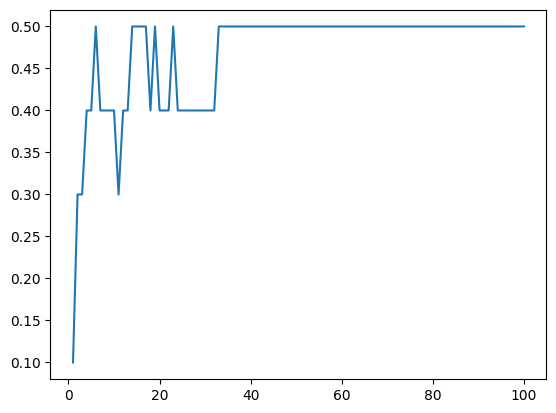

In [133]:
from matplotlib import pyplot as plt


repSrc = 'small_author_corpus'
vocab = readVocabulary('lm/'+repSrc+'/corpus_20000.vocab')
orderLM = 2
textNbSentences = '_10sentences'
nbWordsSent = 1
prefLM = 'bigram_'

prefLM = 'bigram_'
X=[]
Y=[]


for i in range(40):
    fichAuthors = 'data/'+repSrc+'/validation/authors.txt'
    fichSentences = 'data/'+repSrc+'/validation/sentences'+textNbSentences+'.txt'
    fichRef = 'data/'+repSrc+'/validation/authors'+textNbSentences+'_ref.txt'
    fichHyp = 'data/'+repSrc+'/validation/authors'+textNbSentences+'_hyp-'+prefLM+str(nbWordsSent)+'words.txt'
    dictNgramsAuthors = {}
    authors = readAuthors(fichAuthors)
    for a in authors:
        dictNgramsAuthors[a] = readNgramCounts('lm/'+repSrc+'/'+prefLM+a+'.lm')

    if not os.path.exists(fichHyp):
        recoAuthorsNgrams(fichSentences, dictNgramsAuthors, vocab, orderLM, nbWordsSent, fichHyp)
    recotot=evaluateRecognitionRate(fichRef, fichHyp)
    #print("Taux reco total :", recotot)
    #print("Taux reco par auteur :", evaluateRecognitionRateAuthors(fichRef, fichHyp, fichAuthors))
    X.append(nbWordsSent)
    Y.append(recotot)
    nbWordsSent+=1


plt.plot(X,Y)
plt.show()

### Fonctions à implémenter (pour aller plus loin)

#### Fonction qui identifie les auteurs des phrases d'un fichier, donné en entrée, à partir des modèles n-grammes (en se limitant aux premiers mots de chaque phrase), également donnés en entrée, et qui crée un fichier hypothèse indiquant l'auteur de chaque phrase. On peut également détecter si les phrases ont été écrites par un autre auteur que ceux pour lesquels des modèles de langue sont disponibles.

In [ ]:
# constante pour définir le nom d'auteur inconnu
UNK_AUTHOR = "unknown"

In [ ]:
# crée un fichier hypothèse des noms d'auteurs identifiés, 
# à l'aide de modèles n-grammes (avec lissage de Laplace pour éviter les probas nulles)
def recoAuthorsUnkNgrams(fileSentences, dictNgramsAuthors, vocab, orderLM, nbWordsSentences, fileHypAuthors):
    # à compléter
    raise NotImplementedError

#### Evaluation de la fonction d'identification des auteurs, dont des auteurs inconnus, à l'aide de modèles n-grammes simples

In [ ]:
# test de la fonction, avec les modèles n-grammes fournis
repSrc = 'small_author_corpus'
vocab = readVocabulary('lm/'+repSrc+'/corpus_20000.vocab')
orderLM = 2
textNbSentences = '_test-unk_10sentences'
nbWordsSent = 20
prefLM = 'bigram_'

fichAuthorsLM = 'data/'+repSrc+'/validation/authors.txt'
fichAuthors = 'data/'+repSrc+'/validation/authors_unknown.txt'
fichSentences = 'data/'+repSrc+'/validation/sentences'+textNbSentences+'.txt'
fichRef = 'data/'+repSrc+'/validation/authors'+textNbSentences+'_ref.txt'
fichHyp = 'data/'+repSrc+'/validation/authors'+textNbSentences+'_hyp-'+prefLM+str(nbWordsSent)+'words.txt'

dictNgramsAuthors = {}
authorsLM = readAuthors(fichAuthorsLM)
for a in authorsLM:
    dictNgramsAuthors[a] = readNgramCounts('lm/'+repSrc+'/'+prefLM+a+'.lm')


if not os.path.exists(fichHyp):
    recoAuthorsUnkNgrams(fichSentences, dictNgramsAuthors, vocab, orderLM, nbWordsSent, fichHyp)
print("Taux reco total :", evaluateRecognitionRate(fichRef, fichHyp))
print("Taux reco par auteur :", evaluateRecognitionRateAuthors(fichRef, fichHyp, fichAuthors))


Taux reco total : 0.5
Taux reco par auteur : {'balzac': 0.0, 'hugo': 0, 'maupassant': 0, 'moliere': 0, 'montaigne': 0.5, 'sand': 0, 'tocqueville': 1.0, 'tolstoi': 0.0, 'verne': 0, 'zola': 1.0, 'unknown': 0.0}


#### Evaluation de la fonction d'identification des auteurs, dont les auteurs inconnus, en faisant varier la taille des phrases prises en compte ainsi que la taille des modèles de langue (utiliser plutôt des modèles bigrammes)
On travaillera tout d'abord sur le fichier de phrases `data/small_author_corpus/validation/sentences_test-unk_100sentences.txt` puis on pourra passer au fichier `data/author_corpus/validation/sentences_test-unk.txt` après avoir trouvé les meilleures valeurs pour le nombre de mots dans les phrases ainsi que pour le nombre de phrases à considérer dans les corpus d'entraînement (des graphiques matplotlib peuvent être faits).

In [ ]:
# à compléter